In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from glob import glob

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
import cv2

In [2]:
import os
print(os.listdir('/content/drive/MyDrive/IMG'))

['karthi-2.JPG', 'karthi-1.jpg', 'karthi-66.jpg', 'karthi-128.jpg', 'karthi-117.jpg', 'karthi-150.jpg', 'karthi-74.jpg', 'karthi-129.jpg', 'karthi-80.jpg', 'karthi-119.jpg', 'karthi-137.jpg', 'karthi-120.jpg', 'karthi-130.jpg', 'karthi-136.jpg', 'karthi-122.jpg', 'karthi-131.jpg', 'karthi-149.jpg', 'karthi-134.jpg', 'karthi-133.jpg', 'karthi-148.jpg', 'karthi-95.jpg', 'karthi-147.jpg', 'karthi-138.jpg', 'karthi-123.jpg', 'karthi-114.jpg', 'karthi-113.jpg', 'karthi-110.jpg', 'karthi-112.jpg', 'karthi-146.jpg', 'karthi-105.jpg', 'karthi-96.jpg', 'karthi-104.jpg', 'karthi-97.jpg', 'karthi-103.jpg', 'karthi-102.jpg', 'karthi-139.jpg', 'karthi-106.jpg', 'karthi-145.jpg', 'karthi-132.jpg', 'karthi-127.jpg', 'karthi-78.jpg', 'karthi-88.jpg', 'karthi-90.jpg', 'karthi-89.jpg', 'karthi-93.jpg', 'karthi-126.jpg', 'karthi-116.jpg', 'karthi-85.jpg', 'karthi-121.jpg', 'karthi-87.jpg', 'karthi-101.jpg', 'karthi-125.jpg', 'karthi-124.jpg', 'karthi-91.jpg', 'karthi-118.jpg', 'karthi-86.jpg', 'karthi-94

In [5]:
category = ["karthika", "sateesh"]

EPOCHS                  = 30
IMGSIZE                 = 128
CHANNELS                = 1 # grayscale
BATCH_SIZE              = 32
STOPPING_PATIENCE       = 8
VERBOSE                 = 1
MODEL_NAME              = 'cnn_30epochs_imgsize128.h5'
OPTIMIZER               = 'adam'
TRAINING_DIR            = '/content/drive/MyDrive/Images/Train_Data'
TEST_DIR                = '/content/drive/MyDrive/Images/Test_Data'


In [6]:
generator = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory( directory=TRAINING_DIR, 
                                            target_size=(IMGSIZE, IMGSIZE),
                                            color_mode='grayscale',
                                            classes=category, 
                                            batch_size=BATCH_SIZE, 
                                            )


test_data = generator.flow_from_directory( directory=TEST_DIR, 
                                           target_size=(IMGSIZE, IMGSIZE), 
                                           color_mode='grayscale',
                                           classes=category, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=False
                                           )

Found 301 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMGSIZE, IMGSIZE, CHANNELS)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [8]:
es = EarlyStopping(patience=STOPPING_PATIENCE, 
                   monitor='val_accuracy', 
                   mode='max', 
                   verbose=1, 
                   restore_best_weights=True)

history = model.fit_generator(train_data, 
                              epochs=EPOCHS, 
                              validation_data=test_data,
                              shuffle=True,
                              callbacks=[es]
                             )

<ipython-input-8-5ec455816651>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - 59s 6s/step - loss: 0.8188 - accuracy: 0.7907 - val_loss: 0.6798 - val_accuracy: 0.5333
Epoch 2/30
10/10 [==============================] - 33s 3s/step - loss: 0.7704 - accuracy: 0.8439 - val_loss: 0.6327 - val_accuracy: 0.6667
Epoch 3/30
10/10 [==============================] - 32s 3s/step - loss: 0.4740 - accuracy: 0.8605 - val_loss: 0.9413 - val_accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 35s 3s/step - loss: 0.3328 - accuracy: 0.9003 - val_loss: 1.1847 - val_accuracy: 0.5000
Epoch 5/30
10/10 [==============================] - 33s 3s/step - loss: 0.3082 - accuracy: 0.8937 - val_loss: 0.9284 - val_accuracy: 0.5000
Epoch 6/30
10/10 [==============================] - 31s 3s/step - loss: 0.2311 - accuracy: 0.9369 - val_loss: 0.9836 - val_accuracy: 0.5000
Epoch 7/30
10/10 [==============================] - 32s 3s/step - loss: 0.4730 - accuracy: 0.8970 - val_loss: 1.2328 - val_accuracy: 0.5000
Epoch 8/30
10/10 [==

In [9]:
train_acc = model.evaluate(train_data)
test_acc = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.6383 - accuracy: 0.6667


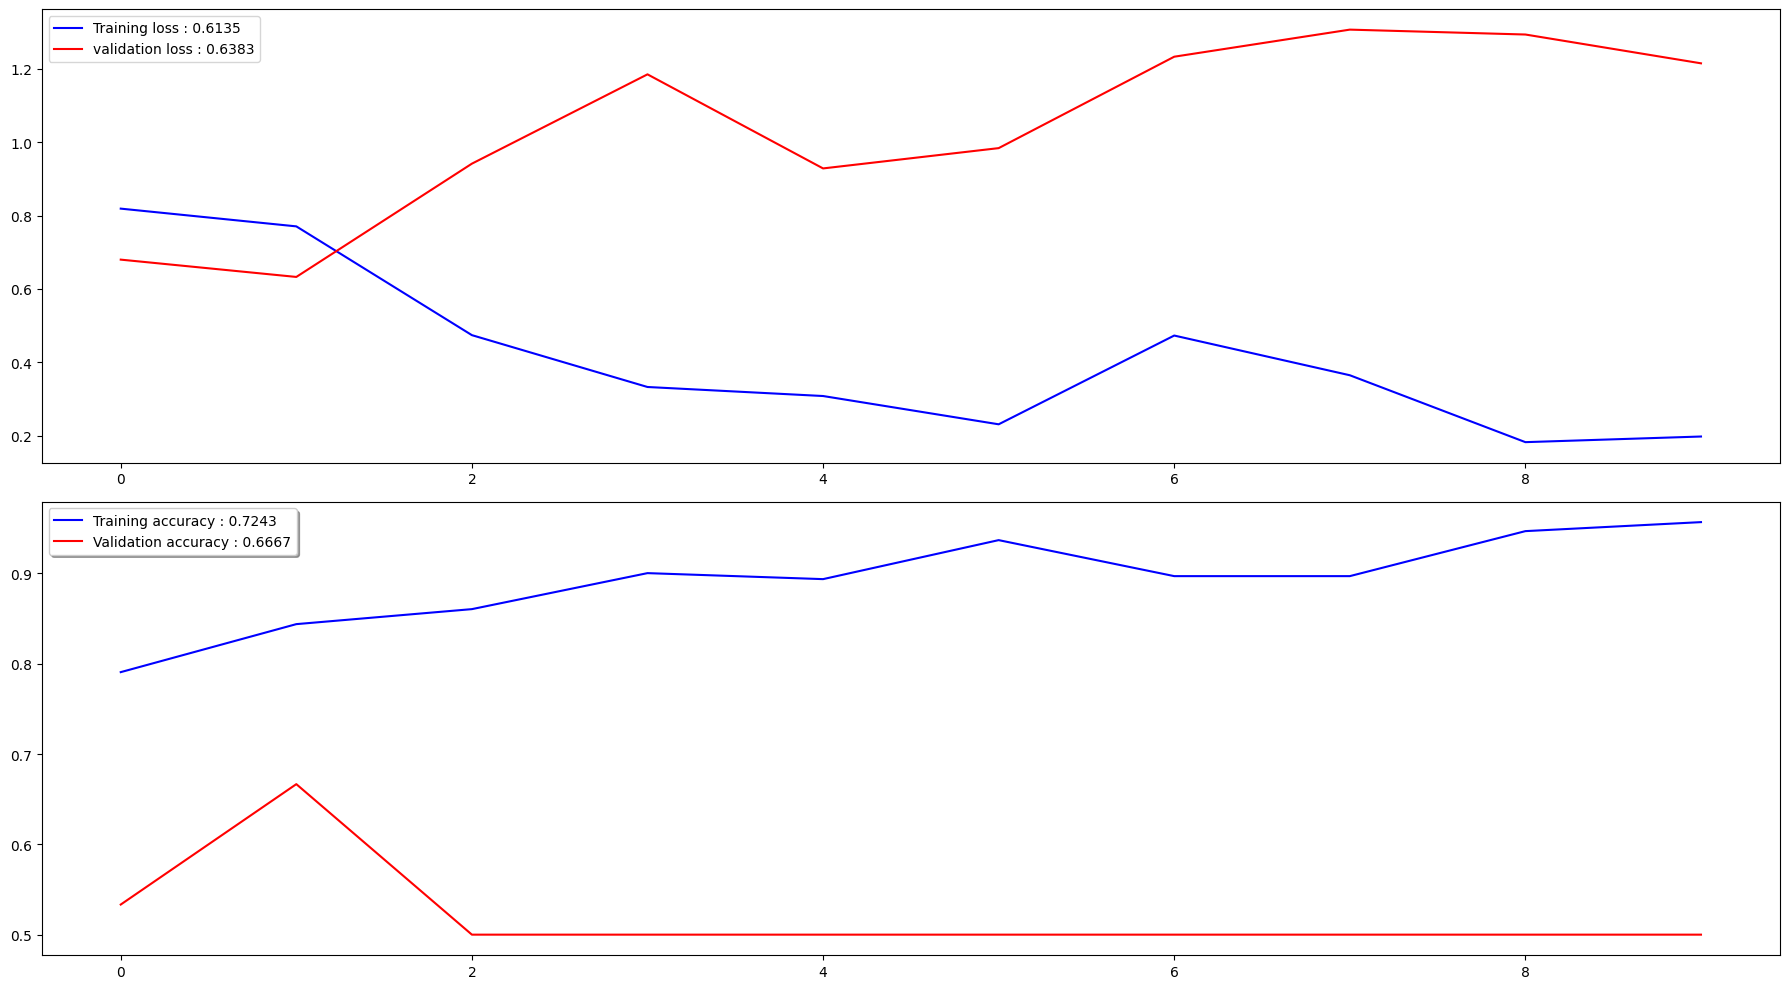

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))
ax1.plot(history.history['loss'], color='b', label="Training loss : {:0.4f}".format(train_acc[0]))
ax1.plot(history.history['val_loss'], color='r', label="validation loss : {:0.4f}".format(test_acc[0]))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy : {0:.4f}".format(train_acc[1]))
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy : {0:.4f}".format(test_acc[1]))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [11]:
test_paths = np.array(glob(TEST_DIR + '/*/*.jpg'))

np.random.seed(42)
ids = np.random.choice(np.arange(len(test_paths)), size=32)

samples = test_paths[ids]

In [12]:
im_test = []
c = 0
for img in samples:
    c = c + 1
    img_path =img
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (IMGSIZE, IMGSIZE))
    img_arr = img_arr / 255.0
    im_test.append(img_arr)

    
im_test = np.array(im_test).reshape(-1, IMGSIZE, IMGSIZE, 1)
im_pred = model.predict(im_test)

1/1 [==============================] - 1s 701ms/step


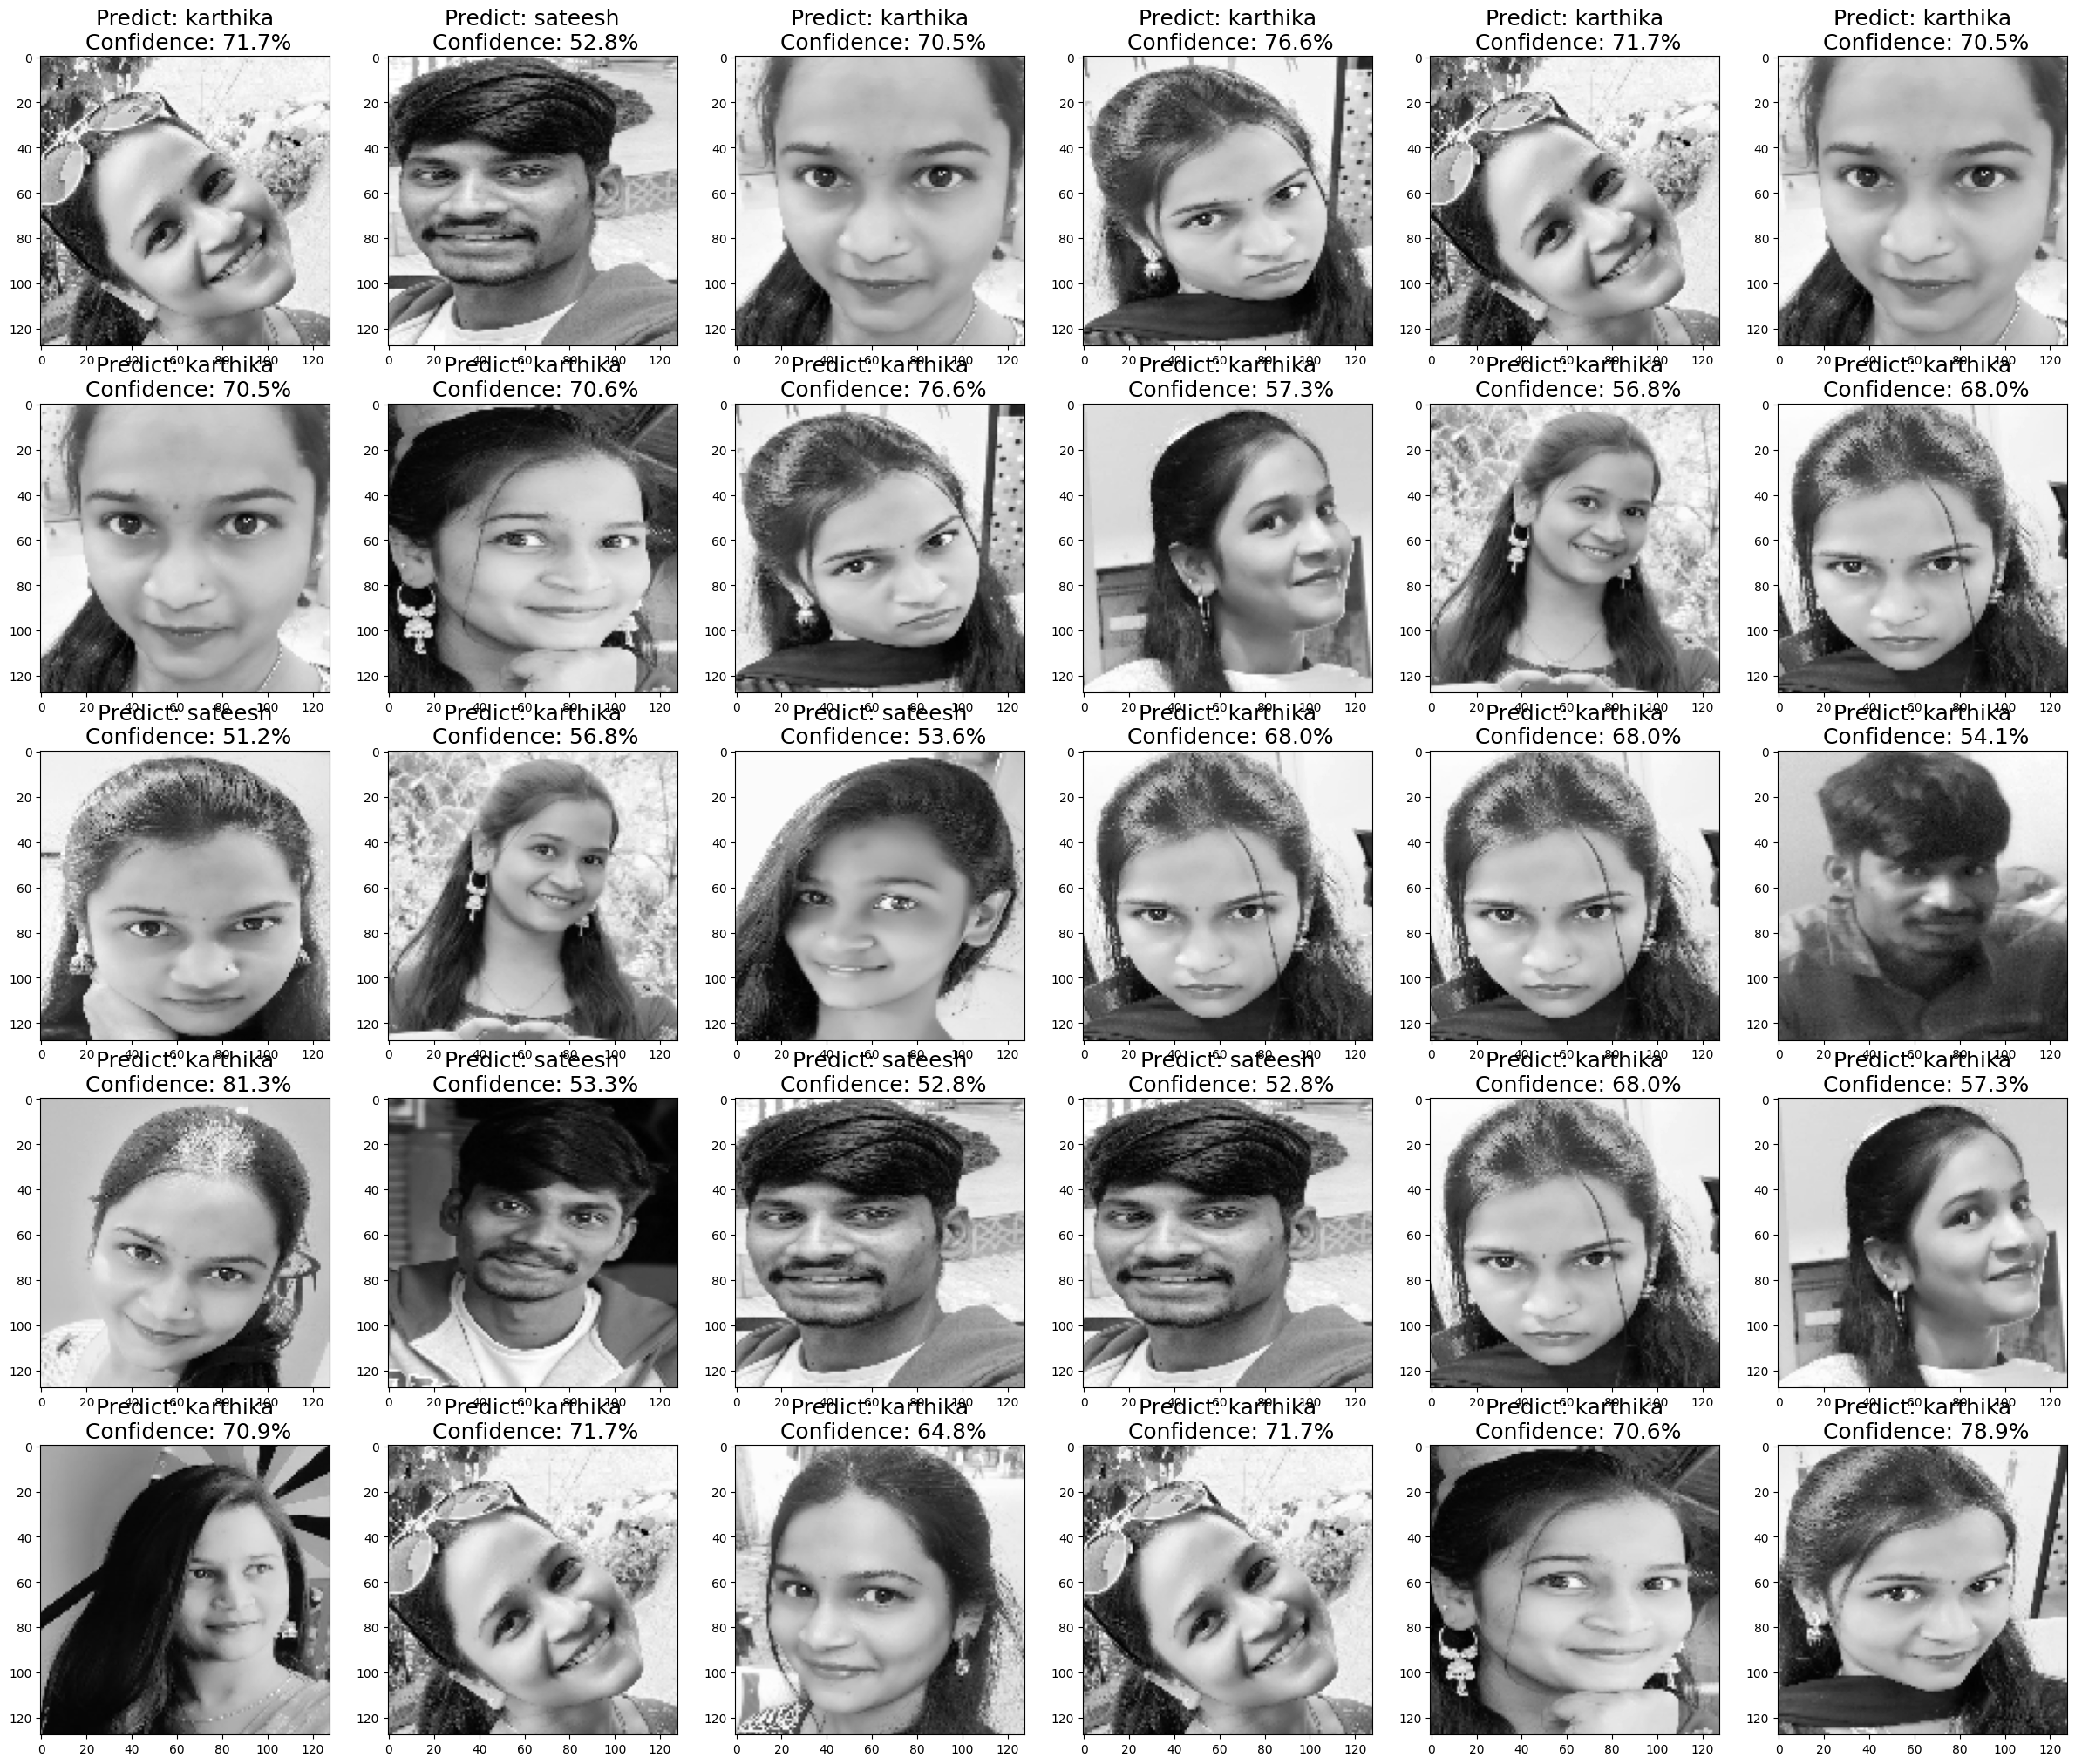

In [17]:
fig , ax = plt.subplots(6, 6, figsize=(30, 25))

for i, axis in enumerate(ax.flat):
    axis.imshow(im_test[i][:, :, 0], cmap='gray')
    pred_class = im_pred[i].argmax()
    pred_prob = im_pred[i].max() * 100

    axis.set_title(f'Predict: {category[pred_class]}\n Confidence: {pred_prob:.1f}%', fontsize=18)

In [14]:
# save the model weights
model.save_weights(MODEL_NAME)